In [6]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from multiprocessing import Pool
import holt_modeling as hm
%reload_ext autoreload
%autoreload 2

In [28]:
df = pd.read_pickle('community_hour.pickle')

# gather all areas in df
areas = df.pickup_community_area.unique()

# create hourly timeframe for the entire df to 
# make sure there are no missing lags in modeling
daterange = pd.date_range(df['date_time'].iloc[0],
                          df['date_time'].iloc[-1],
                          freq='h')

In [96]:
%%time

# set the model variables for the iterations
iterable = [(df, daterange, area, 20, 15) for area in areas]

# load the model
test = hm.run_area_test

# run one model for each computer processor
if __name__ == '__main__':
    with Pool() as pool:
        predictions = pool.starmap(test, iterable)
    pool.close()

Starting with area: 1
Starting with area: 12
Starting with area: 15
Starting with area: 18
Starting with area: 20
Starting with area: 23
Starting with area: 26
Starting with area: 29
Done with area: 29
Starting with area: 3
Done with area: 18
Starting with area: 19
Done with area: 26
Starting with area: 27
Done with area: 12
Starting with area: 13
Done with area: 20
Starting with area: 21
Done with area: 15
Starting with area: 16
Done with area: 23
Starting with area: 24
Done with area: 1
Starting with area: 10
Done with area: 3
Starting with area: 30
Done with area: 27
Starting with area: 28
Done with area: 19
Starting with area: 2
Done with area: 13
Starting with area: 14
Done with area: 24
Starting with area: 25
Done with area: 16
Starting with area: 17
Done with area: 21
Starting with area: 22
Done with area: 10
Starting with area: 11
Done with area: 28
Starting with area: 31
Done with area: 30
Starting with area: 34
Done with area: 14
Starting with area: 37
Done with area: 2
Start

In [97]:
rmse = np.array([x["val_rmse"] for x in predictions])
test_rmse = np.array([x["test_rmse"] for x in predictions])

print(f'average train rmse: {rmse.mean()}')
print(f'total train rmse: {rmse.sum()}')
print(f'average test rmse: {test_rmse.mean()}')
print(f'total test rmse: {test_rmse.sum()}')

average train rmse: 28.059220196640428
total train rmse: 2160.559955141313
average test rmse: 23.134522204733557
total test rmse: 1781.358209764484


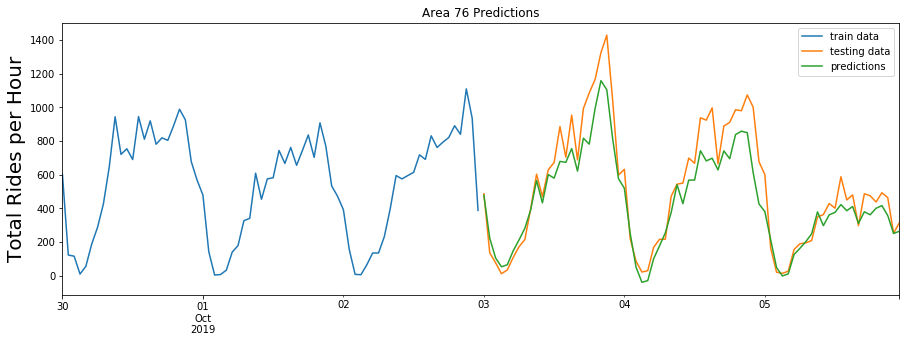

In [100]:
hm.plot_predictions(predictions[71], start=-24*3, area=True, save=True)

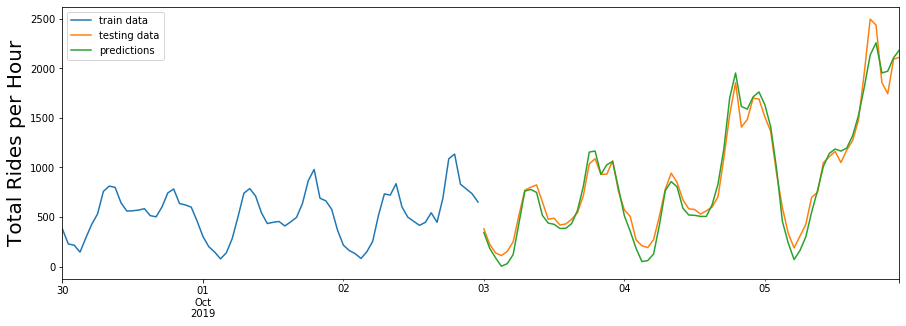

In [103]:
hm.plot_predictions(predictions[53], start=-24*3, save=True)

In [41]:
pd.DataFrame(predictions).to_pickle('area_predictions.pickle')